In [38]:
import pandas as pd
import numpy as np

import acquire
from acquire import get_telco_data
import prepare
from prepare import prep_telco ,split_function

from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [39]:
# Load the telco dataset using acquire.get_telco_data()
telco = acquire.get_telco_data()
telco

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [40]:
telco.dtypes

payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

In [41]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [42]:
# Use the prep_telco function
telco = prep_telco(telco)
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,True,False,False,True,False,False,False,False,False,True
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,False,False,True,False,False,False,False,False,False,True
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,False,False,False,False,False,True,False,False,True,False
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,True,False,True,False,False,True,False,False,True,False
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,True,False,False,False,False,True,False,False,False,True


In [44]:
telco.dtypes

customer_id                               object
gender                                    object
senior_citizen                             int64
partner                                   object
dependents                                object
tenure                                     int64
phone_service                             object
multiple_lines                            object
online_security                           object
online_backup                             object
device_protection                         object
tech_support                              object
streaming_tv                              object
streaming_movies                          object
paperless_billing                         object
monthly_charges                          float64
total_charges                            float64
churn                                     object
contract_type                             object
internet_service_type                     object
payment_type        

In [43]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

In [45]:
telco.shape

(7043, 48)

Sample questions
What month are customers most likely to churn and does that depend on their contract type?

<Figure size 1200x800 with 0 Axes>

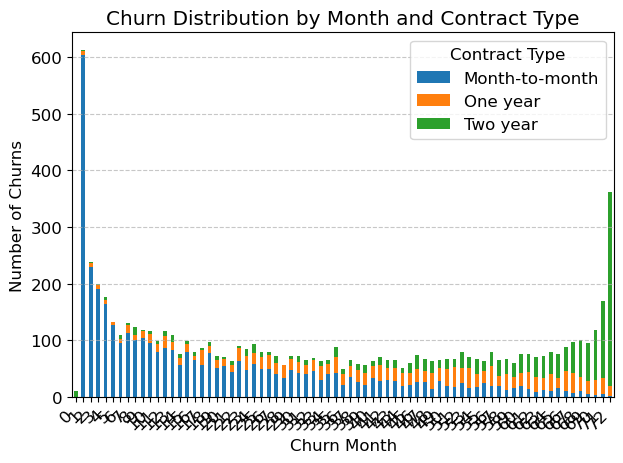

In [46]:

# Load the dataset
# data = pd.read_csv('telco_data.csv')

# Calculate churn month as tenure
telco['churn_month'] = telco['tenure']

# Group by churn month and contract type
churn_by_month_contract = telco.groupby(['churn_month', 'contract_type']).size().unstack()

# Increase the figure size and set font size
plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 12

# Plot the results with rotated X-axis labels
churn_by_month_contract.plot(kind='bar', stacked=True)

plt.xlabel('Churn Month')
plt.ylabel('Number of Churns')
plt.title('Churn Distribution by Month and Contract Type')
plt.legend(title='Contract Type')

# Rotate X-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add grid lines for clarity
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
Even though the first 5 months seems to have churned quiet a lot of
customers, second month indicates the highest number of churns of customers who were on the month-to-month contract. type.


In [ ]:
Investigating
why they are motivated to do so?
Look for patterns or trends that might explain the higher churn rate 

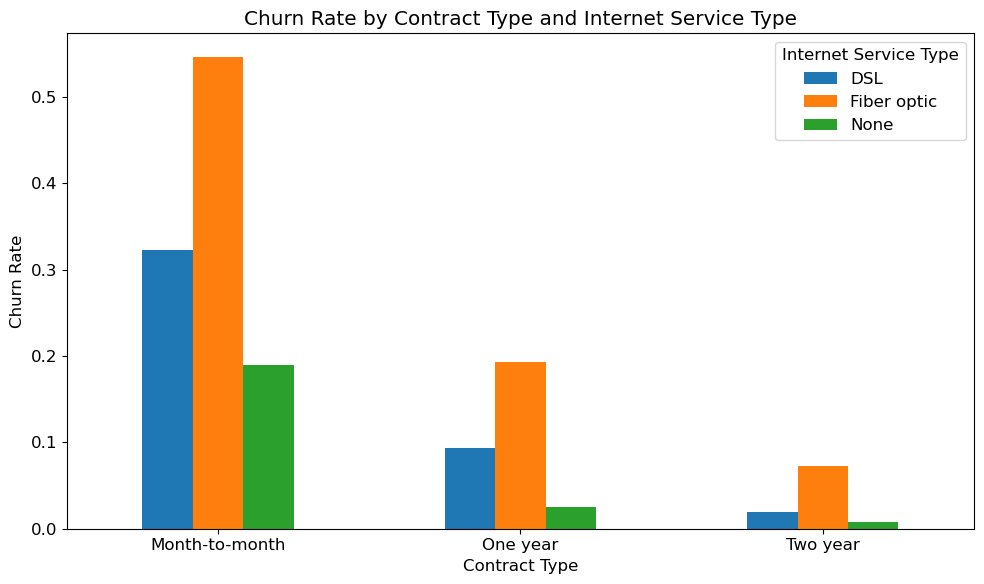

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
#data = pd.read_csv('telco_data.csv')

# Calculate churn rate as a percentage
telco['churn_rate'] = (telco['churn'] == 'Yes').astype(int)

# Group by contract type, internet service type, and calculate mean churn rate
grouped_data = telco.groupby(['contract_type', 'internet_service_type'])['churn_rate'].mean().reset_index()

# Pivot the data for visualization
pivot_data = grouped_data.pivot(index='contract_type', columns='internet_service_type', values='churn_rate')

# Create grouped bar charts
pivot_data.plot(kind='bar', figsize=(10, 6))

plt.title('Churn Rate by Contract Type and Internet Service Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)

plt.legend(title='Internet Service Type')
plt.tight_layout()
plt.show()


The customer churn rate is influenced by Contract Type and Internet Service Type. There could be several reasons like Service Quality,Technology Reliability etc which influenced the higher customer churn rate for fiber optic internet service compared to DSL, for month-to-month, 1-year contract or 2-year contract customers.Analyze features such as monthly charges, contract type, and any additional services (e.g., online security, tech support) that might be influencing churn rates differently for Fiber optic users. Increased churn could be due to other factors like complaints related to internet service quality, speed, reliability, and customer support for Fiber optic.Investigating further on the reasons behind is beyond the scope of this project.

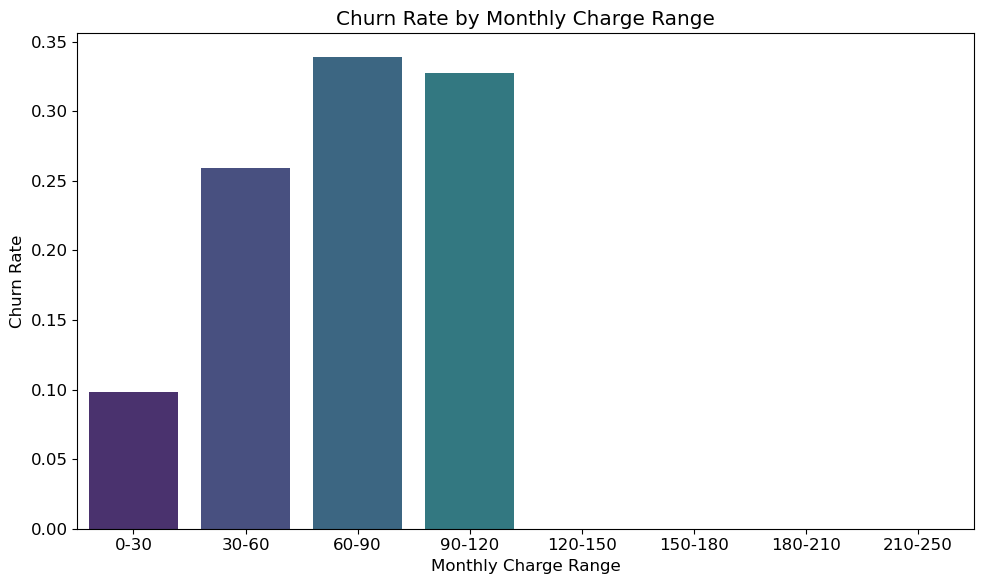

In [48]:
#Churn Rate by Monthly Charge Range
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
#data = pd.read_csv('telco_data.csv')

# Calculate churn rate as a percentage
telco['churn_rate'] = (telco['churn'] == 'Yes').astype(int)

# Define bins for monthly charges
bins = [0, 30, 60, 90, 120, 150, 180, 210, 250]
labels = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-250']

# Create a new column with monthly charge ranges
telco['monthly_charge_range'] = pd.cut(telco['monthly_charges'], bins=bins, labels=labels)

# Calculate churn rates within each charge range
churn_by_charge_range = telco.groupby('monthly_charge_range')['churn_rate'].mean().reset_index()

# Set up the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_by_charge_range, x='monthly_charge_range', y='churn_rate', palette='viridis')

plt.title('Churn Rate by Monthly Charge Range')
plt.xlabel('Monthly Charge Range')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()


In [ ]:
The customers who had to pay more than 60$ a month are more likely to churn.
Figure out the percentage of churn rate for above 60 monthly charge

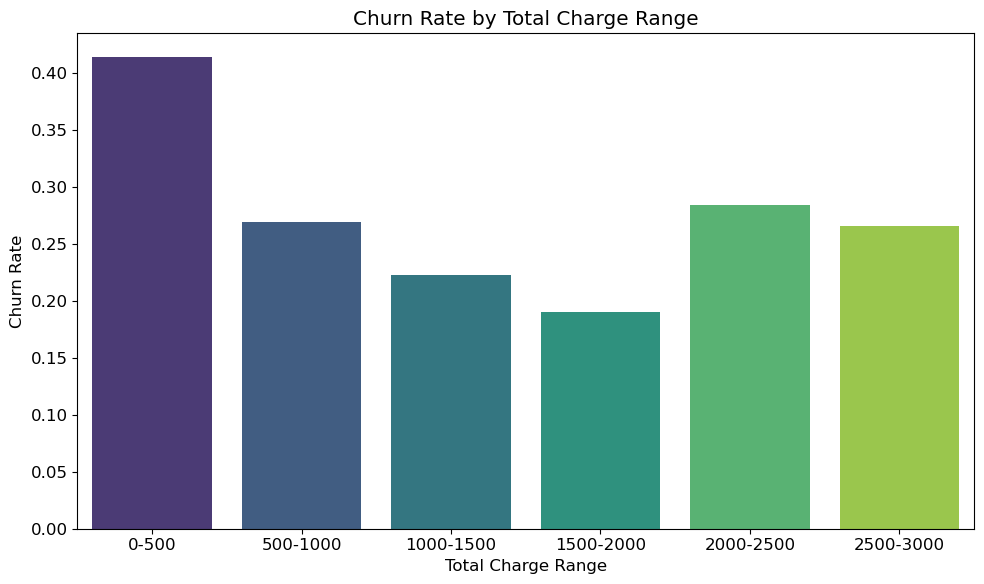

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
#telco = pd.read_csv('telco_data.csv')

# Convert 'total_charges' column to numeric
telco['total_charges'] = pd.to_numeric(telco['total_charges'], errors='coerce')

# Calculate churn rate as a percentage
telco['churn_rate'] = (telco['churn'] == 'Yes').astype(int)

# Define bins for total charges
bins = [0, 500, 1000, 1500, 2000, 2500, 3000]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000']

# Create a new column with total charge ranges
telco['total_charge_range'] = pd.cut(telco['total_charges'], bins=bins, labels=labels)

# Calculate churn rates within each charge range
churn_by_total_charge_range = telco.groupby('total_charge_range')['churn_rate'].mean().reset_index()

# Set up the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_by_total_charge_range, x='total_charge_range', y='churn_rate', palette='viridis')

plt.title('Churn Rate by Total Charge Range')
plt.xlabel('Total Charge Range')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()


The customer churn rate is not influenced by the increase in total charges. It could be due to various factors like Perceived Value,Loyalty Programs etc. Beyond the scope of this project so didn't analyse any further.

In [ ]:
Lets do 
Hypothesis Test:
Null Hypothesis (H0): The churn month and contract type are independent (i.e., no relationship).
Alternative Hypothesis (H1): The churn month and contract type are dependent (i.e., there's a relationship).    

- Prepare your data by creating a contingency table that shows the counts of churn and no-churn cases for each combination of contract type and churn month    

In [53]:
# Calculate churn month as tenure
telco['churn_month'] = telco['tenure']

# Create the contingency table using churn_encoded column
contingency_table = pd.crosstab(index=telco['churn_encoded'], columns=[telco['contract_type']], margins=True)

# Print the contingency table
print(contingency_table)


contract_type  Month-to-month  One year  Two year   All
churn_encoded                                          
0                        2220      1307      1647  5174
1                        1655       166        48  1869
All                      3875      1473      1695  7043


 - use a chi-squared test for independence
- This test will compute a chi-squared statistic and a p-value.

In [51]:
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,churn_month,churn_rate,monthly_charge_range,total_charge_range
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,False,False,False,False,False,True,9,0,60-90,500-1000
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,False,False,False,False,False,True,9,0,30-60,500-1000
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,False,True,False,False,True,False,4,1,60-90,0-500
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,False,True,False,False,True,False,13,1,90-120,1000-1500
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,False,True,False,False,False,True,3,1,60-90,0-500


In [ ]:
If p-value ≤ alpha: Reject the null hypothesis, and conclude that there is a statistically significant relationship between the variables.
If p-value > alpha: Fail to reject the null hypothesis, and conclude that there is no statistically significant relationship between the variables.


In [56]:

# Load the dataset
# telco = pd.read_csv('telco_data.csv')

# Calculate churn month as tenure
telco['churn_month'] = telco['tenure']

# Create the contingency table using churn_encoded column
contingency_table = pd.crosstab(index=telco['churn_encoded'], columns=[telco['contract_type']], margins=True)

# Perform chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Squared Statistic:", chi2_stat)
print("P-Value:", p_val)


Chi-Squared Statistic: 1184.5965720837926
P-Value: 1.0319060455020843e-252


In [ ]:
If p-value ≤ alpha: Reject the null hypothesis, and conclude that there is a statistically significant relationship between the variables.
If p-value > alpha: Fail to reject the null hypothesis, and conclude that there is no statistically significant relationship between the variables.
